# [SNA] Assignment3
### 20176005 Jegyeong Kim
Please write your own PYTHON codes for several centrality measures.

Hope you make a generalized function workable with any networks as well as ours. 


1. Degree centrality (directed/undirected respectively)

2. Closeness centrality

3. Betweenness centrality (restricted to the our examples only)

4. Authority and Hub (We will learn on upcoming Monday)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
D = nx.DiGraph()
D.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), ('D', 'A'), ('D', 'C'), ('D', 'E'),('E', 'A')])
G = D.to_undirected()

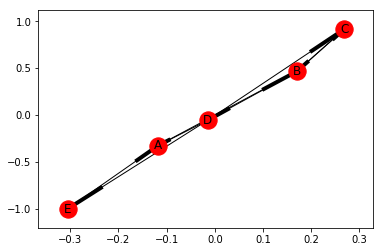

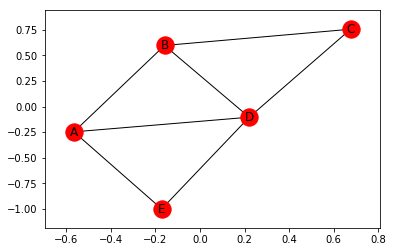

In [3]:
nx.draw_networkx(D), plt.show()
nx.draw_networkx(G)

In [4]:
class Centrality():
    def __init__(self, graph):
        self.graph = graph
        self.nodes = list(self.graph.nodes())
        self.edges = list(self.graph.edges())
        self.node_num = len(self.nodes)
        self.reachable = {node: [target for target, value in nx.shortest_path_length(self.graph, node).items()\
                                 if value>0] for node in self.nodes}
        
    ################################################################ Degree Centrality #######################################
    def degree_centrality(self):
        """ Calculate degree centrality """
        result = {node: sum(1 if node in edge else 0 for edge in self.edges)\
                  /(self.node_num-1) for node in self.nodes}
        return result
        
        
    def in_degree_centrality(self):
        """ Calculate in-degree centrality """      
        result = {node: sum(1 if node==edge[1] else 0 for edge in self.edges)\
                  /(self.node_num-1) for node in self.nodes}   
        return result

            
    def out_degree_centrality(self):
        """ Calculate out-degree centrality """
        result = {node: sum(1 if node==edge[0] else 0 for edge in self.edges)\
                  /(self.node_num-1) for node in self.nodes}
        return result
    ###########################################################################################################################
    
    


    ################################################################ Closeness Centrality #####################################
    def closeness_centrality(self, normalize=True):
        """ Calculate closeness centrality 
        Parameters
        ----------
        normalize : True or False
        """
        if normalize == True:
            result = {node: (len(self.reachable[node])/(self.node_num-1)\
                             *len(self.reachable[node])\
                             /sum(nx.shortest_path_length(self.graph, node, r) for r in self.reachable[node]))\
                      for node in self.nodes}     
            return result

        else:
            result = {node: len(self.reachable[node])\
                      /sum(nx.shortest_path_length(self.graph, node, r) for r in self.reachable[node])\
                      for node in self.nodes}     
            return result
    ###########################################################################################################################

    
    
    
    ################################################################ Betweenness Centrality #####################################
    def betweeness_centrality(self, endpoint=False):
        """ Calculate betweenness centrality """
        if endpoint == True:
            result = {node: (sum(len([path for path in list(nx.all_shortest_paths(self.graph, n, r)) if node in path])\
                                /len(list(nx.all_shortest_paths(self.graph, n, r))) for n in self.nodes for r in self.reachable[n]))\
                             /((self.node_num-1)*(self.node_num-2))\
                      for node in self.nodes}
            return result
        
        else:
            result = {node: ((sum(len([path for path in list(nx.all_shortest_paths(self.graph, n, r)) if node in path])\
                                /len(list(nx.all_shortest_paths(self.graph, n, r))) for n in self.nodes for r in self.reachable[n]))\
                             - (len(self.reachable[node]) + len([a for a in list(self.reachable.values()) if node in a])))
                             /((self.node_num-1)*(self.node_num-2))\
                      for node in self.nodes}
            return result
    ###########################################################################################################################
    
    
    
    
    ################################################################ HITS Algorithm #####################################
    def HITS(self, iterations=100):
        old_authority = dict.fromkeys(self.nodes, 1)
        old_hub = dict.fromkeys(self.nodes, 1)
        
        while(iterations):
            new_authority = {node: sum(old_hub[edge[0]] for edge in self.edges if edge[1]==node) for node in self.nodes}
            new_hub = {node: sum(old_authority[edge[1]] for edge in self.edges if edge[0]==node) for node in self.nodes}
            
            new_authority.update({node: new_authority[node]/sum(new_authority.values()) for node in self.nodes})
            new_hub.update({node: new_hub[node]/sum(new_hub.values()) for node in self.nodes})
            
            if (old_authority == new_authority) & (old_hub == new_hub):
                return new_authority, new_hub
                break
                
            old_authority = new_authority
            old_hub = new_hub
            
            iterations -= 1
            
        return new_authority, new_hub
    ###########################################################################################################################

In [5]:
c = Centrality(G) # undirected graph
d = Centrality(D) # directed graph

#  
### 1. Degree Centrality (directed / undirected respectively)

In [6]:
print('1.1. Degree Centrality of Undirected Graph :\n', c.degree_centrality(),'\n')
print('1.2. In-Degree Centrality of Directed Graph :\n', d.in_degree_centrality(), '\n')
print('1.3. Out-Degree Centrality of Directed Graph :\n', d.out_degree_centrality())

1.1. Degree Centrality of Undirected Graph :
 {'A': 0.75, 'B': 0.75, 'C': 0.5, 'D': 1.0, 'E': 0.5} 

1.2. In-Degree Centrality of Directed Graph :
 {'A': 0.5, 'B': 0.5, 'C': 0.5, 'D': 0.25, 'E': 0.25} 

1.3. Out-Degree Centrality of Directed Graph :
 {'A': 0.25, 'B': 0.5, 'C': 0.25, 'D': 0.75, 'E': 0.25}


#  
### 2. Closeness centrality

In [7]:
print('2.1. Closeness Centrality of Undirected Graph :\n', c.closeness_centrality(), '\n')
print('2.2. Closeness Centrality of Directed Graph :\n', d.closeness_centrality())

2.1. Closeness Centrality of Undirected Graph :
 {'A': 0.8, 'B': 0.8, 'C': 0.6666666666666666, 'D': 1.0, 'E': 0.6666666666666666} 

2.2. Closeness Centrality of Directed Graph :
 {'A': 0.5, 'B': 0.6666666666666666, 'C': 0.4444444444444444, 'D': 0.8, 'E': 0.4444444444444444}


#  
### 3. Betweenness centrality (restricted to the our examples only)

In [8]:
print('3.1. Betweenness Centrality of Undirected Graph :\n',\
      c.betweeness_centrality(), '\n')
print('3.2. Betweenness Centrality of Undirected Graph(including node as endpoint) :\n',\
      c.betweeness_centrality(endpoint=True), '\n')
print('3.3. Betweenness Centrality of Directed Graph :\n',\
      d.betweeness_centrality(),'\n')
print('3.4. Betweenness Centrality of Directed Graph(including node as endpoint) :\n',\
      d.betweeness_centrality(endpoint=True))

3.1. Betweenness Centrality of Undirected Graph :
 {'A': 0.08333333333333333, 'B': 0.08333333333333333, 'C': 0.0, 'D': 0.3333333333333333, 'E': 0.0} 

3.2. Betweenness Centrality of Undirected Graph(including node as endpoint) :
 {'A': 0.75, 'B': 0.75, 'C': 0.6666666666666666, 'D': 1.0, 'E': 0.6666666666666666} 

3.3. Betweenness Centrality of Directed Graph :
 {'A': 0.2916666666666667, 'B': 0.6666666666666666, 'C': 0.041666666666666664, 'D': 0.4166666666666667, 'E': 0.0} 

3.4. Betweenness Centrality of Directed Graph(including node as endpoint) :
 {'A': 0.9583333333333334, 'B': 1.3333333333333333, 'C': 0.7083333333333334, 'D': 1.0833333333333333, 'E': 0.6666666666666666}


#  
### 4. Authority and Hub

In [9]:
print('4. HITS Algorithm')
d.HITS(iterations=100)

4. HITS Algorithm


({'A': 0.30540728933227823,
  'B': 1.1487734012208862e-15,
  'C': 0.3472963553338603,
  'D': 0.12061475842818306,
  'E': 0.22668159690567719},
 {'A': 1.6315760097055907e-15,
  'B': 0.28311858285794766,
  'C': 1.6315760097055907e-15,
  'D': 0.5320888862379544,
  'E': 0.18479253090409478})